PART I: 
Model Phase 1 [30/100]:  - USE selected video (download the video on your local disk) focusing on your –at least two- celebrities. 
(In Hackathon, we are going to provide a sample celebrity video for you)  - Construct your Training DataSet (including your celebrity faces images)  
(The face images should be in variable size. For making easy, you should consider only two cases: 
Big face and small face) - Code the model (YOU ARE LIMITED with the MODELS learned in the Muhammet Erdem’s ANN Course) to 
learn Celebrities faces in two-variable size such as CelebrityA’s small face or big face. - Write down the code classifying Celebrities’s big faces/small faces and non (at least 5 categories) - Prove that your model classifies and detects the face of celebrity correctly.  
Just give the cropped image of the celebrity and ask it to your model. 
(PLEASE Plot THE ACCURACY of TRAINing and TESTing sets at each Epoch.) - Give the CONFUSION MATRIX of the resultant Model.  
 
Location Finding Phase 2 [40/100]: - Your model must detect your celebrities faces on the frame. - Your model must give the location of the faces of your celebrities. 

In [45]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers, models

In [46]:
# Eğitim verilerinin yolu
train_data_path = "/Data/CNN/train"

# Verileri yükleme ve ön işleme
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # %20 validation için
)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(150, 150),  # Resimleri 150x150 olarak ayarlıyoruz
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1603 images belonging to 5 classes.
Found 398 images belonging to 5 classes.


In [47]:
# Örneğin, etiketlerinizin boyutunu kontrol edin
for data_batch, labels_batch in train_generator:
    print("Labels batch shape:", labels_batch.shape)
    break

Labels batch shape: (32, 5)


In [48]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax') 
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



In [49]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30
)


Epoch 1/30


C:\Users\furka\.conda\envs\ANN_Final\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.2803 - loss: 1.8131 - val_accuracy: 0.3047 - val_loss: 1.4526
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.4345 - val_accuracy: 0.5714 - val_loss: 1.1860
Epoch 3/30


C:\Users\furka\.conda\envs\ANN_Final\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 311ms/step - accuracy: 0.3782 - loss: 1.3895 - val_accuracy: 0.3516 - val_loss: 1.4105
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.3438 - loss: 1.2526 - val_accuracy: 0.2857 - val_loss: 1.3685
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 311ms/step - accuracy: 0.4501 - loss: 1.2244 - val_accuracy: 0.4349 - val_loss: 1.3308
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.4688 - loss: 1.0615 - val_accuracy: 0.2857 - val_loss: 1.5842
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 314ms/step - accuracy: 0.5346 - loss: 0.9785 - val_accuracy: 0.6068 - val_loss: 1.0451
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6250 - loss: 0.6508 - val_accuracy: 0.5714 - val_loss: 1.3200
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.5969 - loss: 0.8960 - val_accuracy: 0.5885 - val_loss: 0.9314
Epoch 10/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6250 - loss: 0.6481 - val_accuracy: 0.5714 -

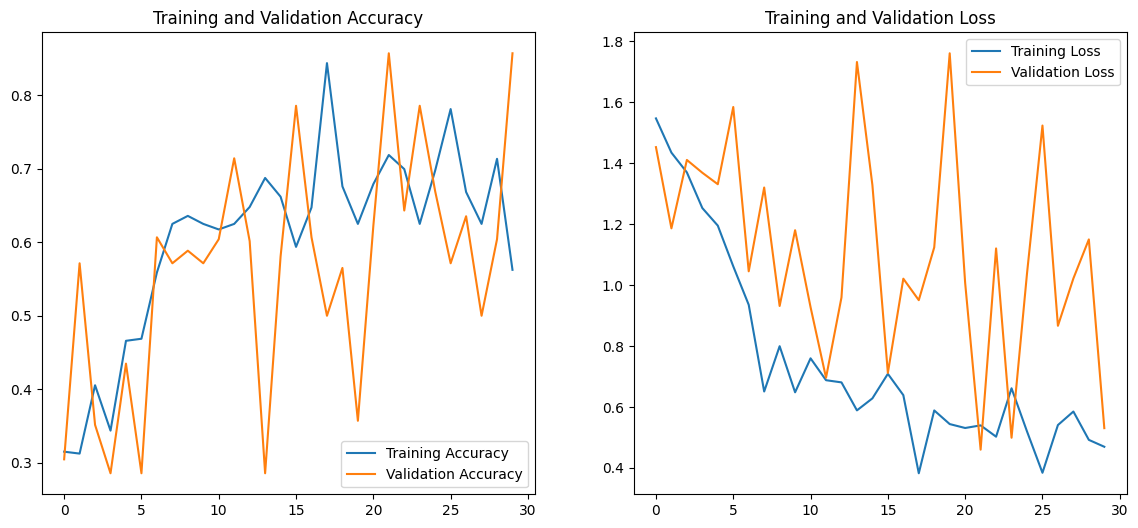

In [52]:
# Eğitim ve doğrulama başarımlarını al
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epoch sayısını belirleme
epochs_range = range(len(acc))

# Plotları oluşturma
plt.figure(figsize=(14, 6))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step


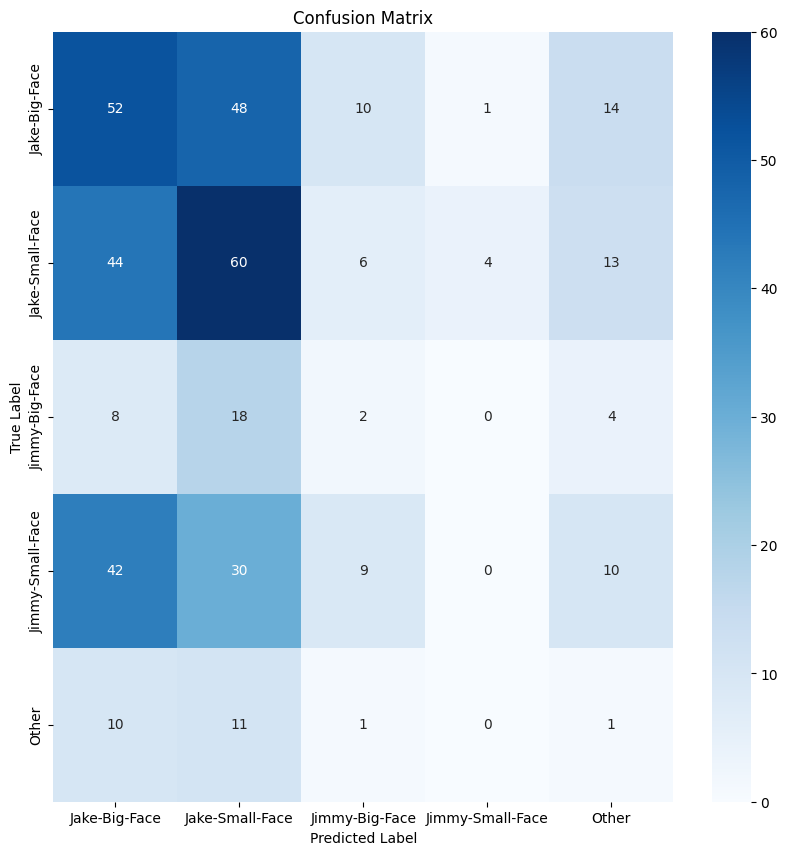

In [53]:
# Tahminler ve gerçek etiketler
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [55]:
import cv2

def detect_faces_in_video(video_path, model):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the frame for detection
        face_resized = cv2.resize(frame, (150, 150)) / 255.0
        face_resized = np.expand_dims(face_resized, axis=0)

        # Predict
        prediction = model.predict(face_resized)
        class_id = np.argmax(prediction)
        label = list(train_generator.class_indices.keys())[class_id]

        # Display results
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        cv2.imshow('Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

video_path = "../Data/Training_Video_Jimmy Kimmel-Jake Johnson.mp4"
detect_faces_in_video(video_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 